#Prompt 1: Visualize statistics of your data

### An Ant Detector

My projects aims to create an ant detector and tracker able to recognize the size of ants. I will be using video footage divided into frames for my data. The first dataset is just for detection, where there is a single ant in a cropped frame with the mass labeled. In this dataset the order of the frames does not matter as they are taken to be individual images. The second part of my dataset is for tracking and consists of consectutive frames of multiple ants with the x and y coordinates of the ant's centerpoint labeled. I'm currently working on labeling a third dataset that combines both of these with both the location and mass of ant labeled (will add info on this dataset when finished).  

First import useful packages:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
from glob import glob

### Dataset 1 Details

The first dataset is currently stored in two folders (one for each camera type used) with the filename indicating the image metadata. I will need to iterate through the filenames in this folder to obtain information about my dataset, and will then store that data in a csv for later use. 

First I need to navigate to the folder where they are stored:

Let's create a list with all the JPG files, and see what the filename looks like

In [9]:
files = list(Path('/home/bg-nimirzia/Documents/mass-train/data').rglob('*JPG'))
print(files[0])

/home/bg-nimirzia/Documents/mass-train/data/Weight_Estim_train_C920/2019-06-26-16_3A04_3A20_ant_C920_CROPPED_0.0096.JPG


The filename consists of "date_randomID_randomID_animal_camera_framedetails_mass.JPG". I will iterate through to put the mass, date, random identifier and camera used in a dataframe. 

In [18]:
date = []
id1 = []
id2 = []
object = []
camera = []
mass = []
fn = []

for f in files:
    fn.append(f.name)
    f = f.with_suffix('').name
    date.append(f.split('_')[0])
    id1.append(f.split('_')[1])
    id2.append(f.split('_')[2])
    object.append(f.split('_')[3])
    camera.append(f.split('_')[4])
    mass.append(float(f.split('_')[6]))

In [23]:
data = {
    'id1': id1,
    'id2': id2,
    'date': date,
    'mass': mass,
    'object': object,
    'camera': camera,
    'filename': fn,
    }

df = pd.DataFrame(data)

In [24]:
# check that dataframe was created properly
df.head()

,id1,id2,date,mass,object,camera,filename
0,3A04,3A20,2019-06-26-16,0.0096,ant,C920,2019-06-26-16_3A04_3A20_ant_C920_CROPPED_0.009...
1,3A20,3A41,2019-06-28-14,0.0085,ant,C920,2019-06-28-14_3A20_3A41_ant_C920_CROPPED_0.008...
2,3A52,3A20,2019-06-26-13,0.0060,ant,C920,2019-06-26-13_3A52_3A20_ant_C920_CROPPED_0.006...
3,3A45,3A47,2019-06-27-18,0.0116,ant,C920,2019-06-27-18_3A45_3A47_ant_C920_CROPPED_0.011...
4,3A08,3A46,2019-06-27-11,0.0010,ant,C920,2019-06-27-11_3A08_3A46_ant_C920_CROPPED_0.001...


The filenames are a little funny due to a previous student's naming convention - I'll fix them soon but for now I'll just fix it in the data frame:

Some overall numbers:

In [25]:
print('High-level statistics:\n')
print('Images: '+str(len(files)))
print('Weight classes: '+str(len(df.mass.unique())))
print('Weight range: '+str(df.mass.min()*1000)+'mg to '+str(df.mass.max()*1000)+'mg')
print('Cameras used: '+str(len(df.camera.unique())))
print('Dates filmed: '+str(len(df.date.unique())))

High-level statistics:

Images: 4944
Weight classes: 79
Weight range: 0.2mg to 25.3mg
Cameras used: 2
Dates filmed: 26


## Plot of the size distribution of the data

The plot shows I mostly have data towards the smaller end of the distribution, which approximately follows the size distribution in the colony (the larger ants are quite rare). However, this also suggests that I should add more images to even out the dataset a bit...

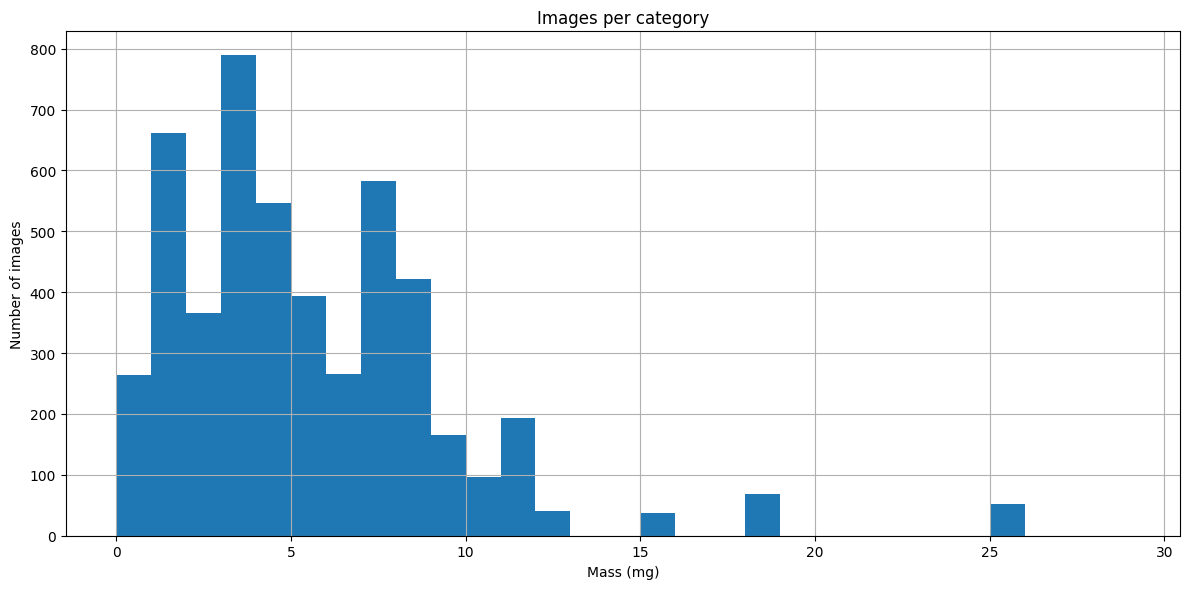

In [ ]:
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 100
plt.hist(df.mass*1000, bins = range(0, 30, 1))
plt.xlabel('Mass (mg)')
plt.ylabel('Number of images')
plt.title('Images per category')
plt.grid(b=None)
plt.tight_layout()
plt.tick_params(axis='x', which='both', bottom=True, top=False)
plt.tick_params(axis='y', which='both', right=False, left=True)
plt.show()

Have the same distribution for each camera, as the same ants were used. 

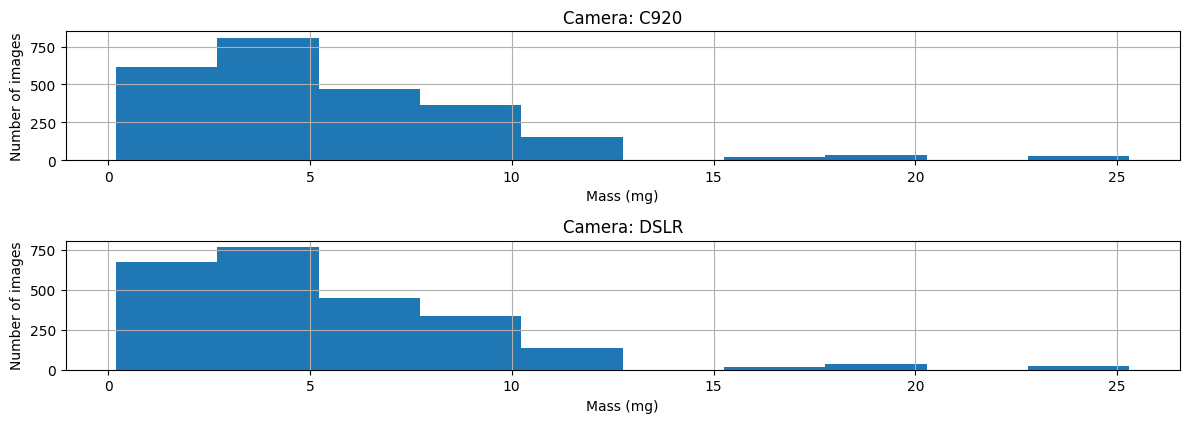

In [ ]:
plt.rcParams['figure.figsize'] = [12, 6]
for idx, loc in enumerate(df['camera'].unique()):
  plt.subplot(3,1,idx+1)
  plt.hist(df['mass'].loc[df['camera'] == loc]*1000)
  plt.xlabel('Mass (mg)')
  plt.ylabel('Number of images')
  plt.title('Camera: '+str(loc))
  plt.grid(b=None)
  plt.tight_layout()
  plt.tick_params(axis='x', which='both', bottom=True, top=False)
  plt.tick_params(axis='y', which='both', right=False, left=True)
plt.show()

How many images does each individual ant have?

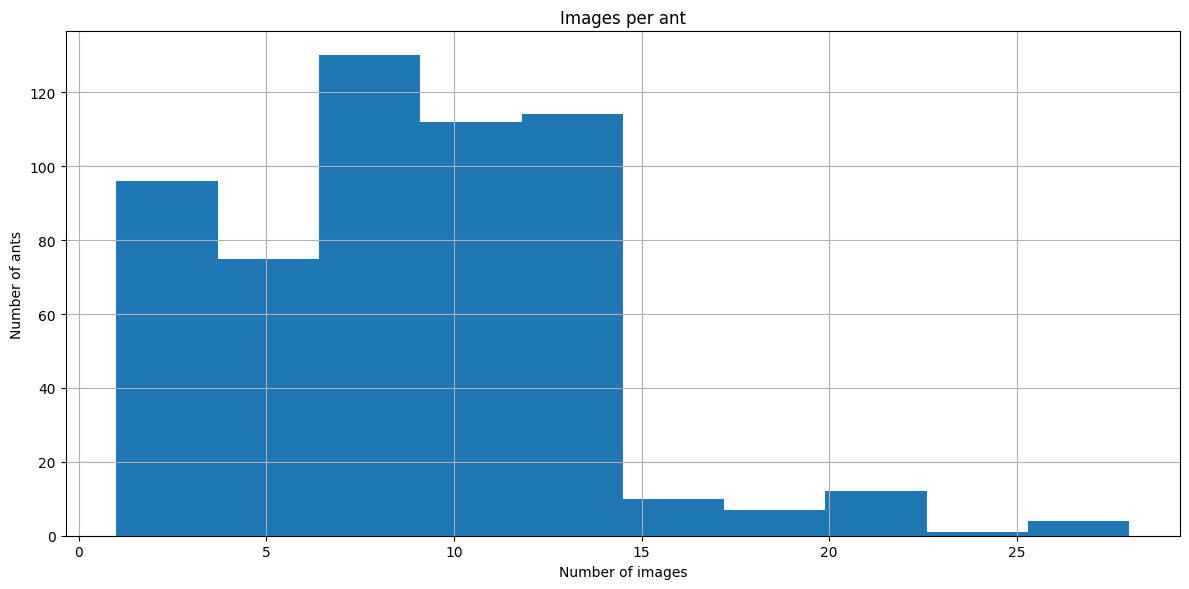

In [ ]:
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 100
plt.hist(df.value_counts(['ant']))
plt.xlabel('Number of images')
plt.ylabel('Number of ants')
plt.title('Images per ant')
plt.grid(b=None)
plt.tight_layout()
plt.tick_params(axis='x', which='both', bottom=True, top=False)
plt.tick_params(axis='y', which='both', right=False, left=True)
plt.show()

In [30]:
print('Each unique ant is represented in about {} images'.format(round(df.value_counts(['mass']).mean())))

Each unique ant is represented in about 63 images


Last, I want to save this dataframe as a csv for later use if I want to expand on this dataset.

In [ ]:
# save as csv
df.to_csv(Path('/home/bg-nimirzia/Documents/mass-train/dataset.csv'), index=False)

## Dataset 2 Details

This dataset is a little bit messier: annotations for each ant are stored in indiviual csv files and in individual folders for each video. Each video folder also contains a '.blend' file that was used for creating the annotations. I will go through each folder to summarize the information.

In [ ]:
# first summarize the folder information
folders = list(Path('Tracking').iterdir())
folders[0]

PosixPath('Tracking/climate-chamber_subcolony_volli_base_1000_mia')

The folder name indicates the "filming location_groupfilmed_species_condition_frames_annotator". I will extract that and the number of files in the folder to get the number of annotations per video.

In [ ]:
loc = []
group = []
species = []
cond = []
frames = []
annotator = []
tracks = []

for folder in folders:
  f = folder.name
  loc.append(f.split('_')[0])
  group.append(f.split('_')[1])
  species.append(f.split('_')[2])
  cond.append(f.split('_')[3])
  frames.append(f.split('_')[4])
  annotator.append(f.split('_')[5])
  tracks.append(len(list(folder.rglob('*csv'))))

In [ ]:
# create dataframe
data = {
    'location': loc,
    'group': group,
    'species': species,
    'condition': cond,
    'frames': frames,
    'annotator': annotator,
    'tracks': tracks
}

tracking_df = pd.DataFrame(data)
tracking_df['frames'] = tracking_df['frames'].astype('int')
tracking_df.head()

,location,group,species,condition,frames,annotator,tracks
0,climate-chamber,subcolony,volli,base,1000,mia,70
1,climate-chamber,subcolony,volli,dark,1000,mia,66
2,climate-chamber,subcolony,volli,noisy,1000,mia,60
3,outside-foraging,colony,volli,handheld,450,mia,237
4,outside-foraging,colony,volli,carrying,1000,sava,80


In [ ]:
print('High-level statistics:\n')
print('Number of ants tracked: '+ str(tracking_df.tracks.sum()))
print('Number of frames tracked: '+ str(tracking_df.frames.sum()))
print('Number of recording conditions: ' + str(len(tracking_df.condition.unique())))

High-level statistics:

Number of ants tracked: 592
Number of frames tracked: 5450
Number of recording conditions: 6


#Prompt 2: load one of your images or videos and visualize it

In [ ]:
# load image for dataset 
from IPython.display import Image
import matplotlib.image as mpimg
import random
import cv2

#### Dataset 1: Single Ant images

In [ ]:
images = []

# select some random images
for i in random.sample(range(0, len(files)), 10):
  images.append(mpimg.imread(str(files[i])))

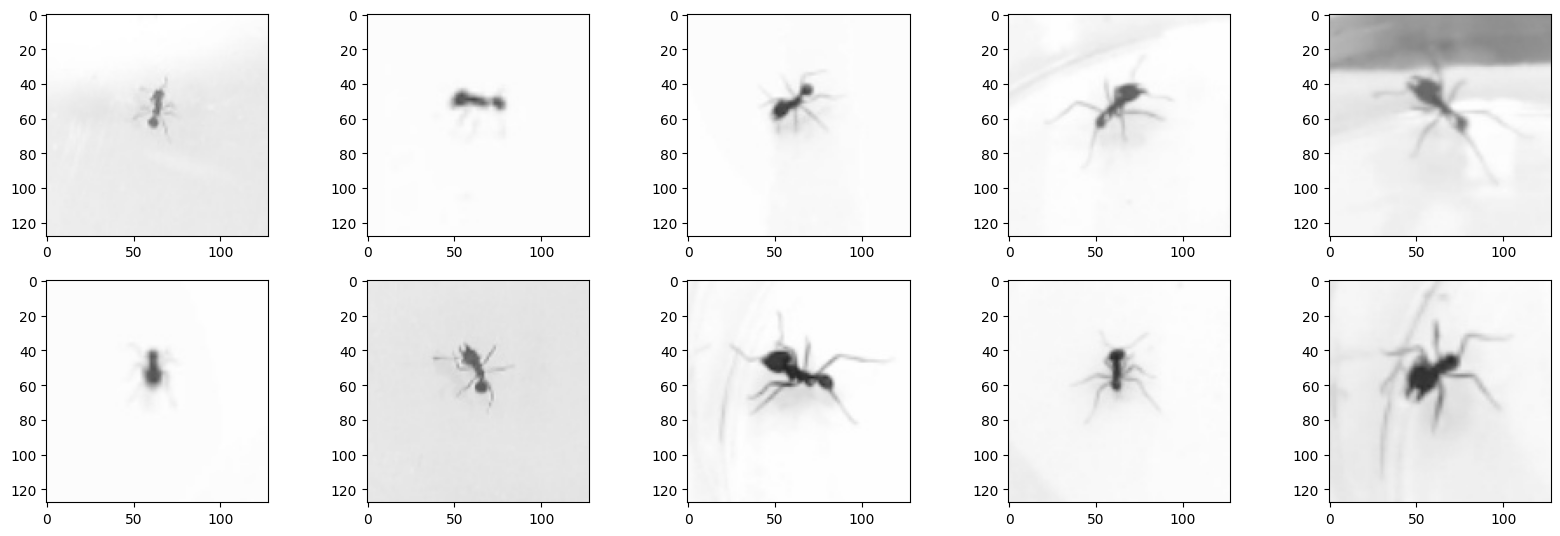

In [ ]:
plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

#### Dataset 2: Display some multi-animal frames from videos

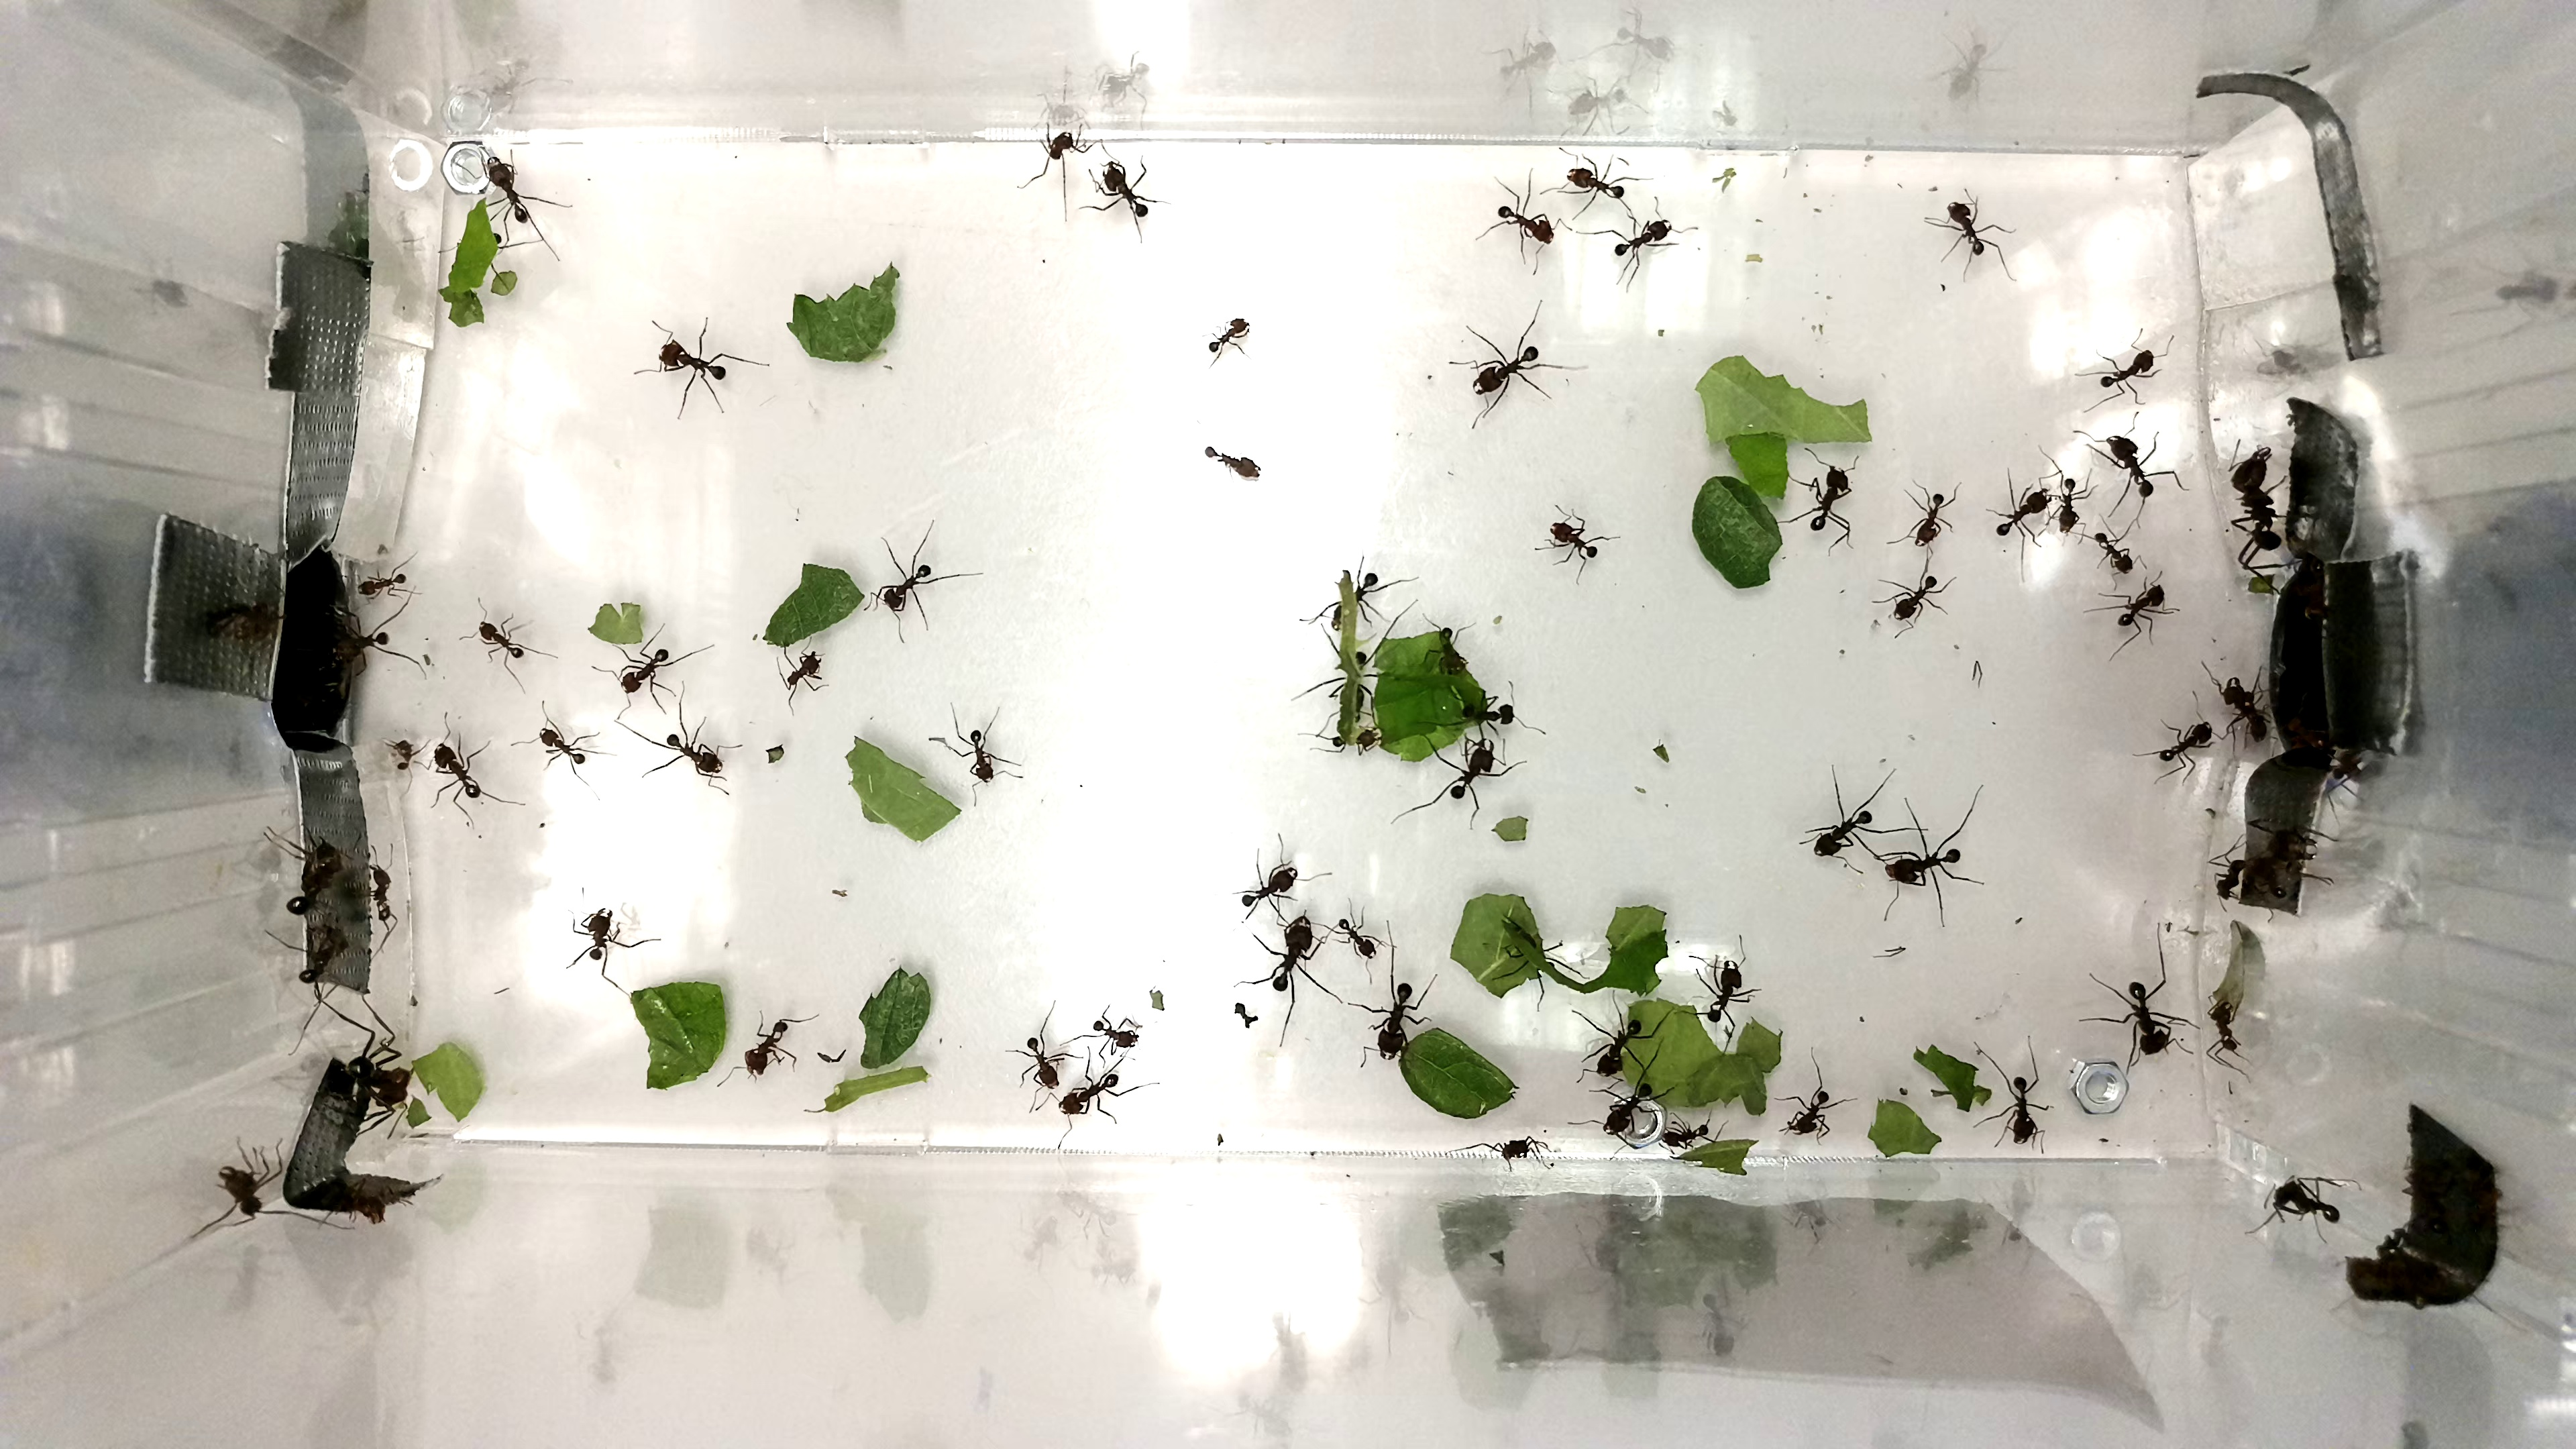

In [ ]:
vidcap = cv2.VideoCapture('Videos/outsideforaging_carrying_bramble_sparse_2.mp4')
_,frame = vidcap.read()
vidcap.release()

Image(data=cv2.imencode(".jpeg", frame)[1].tobytes())

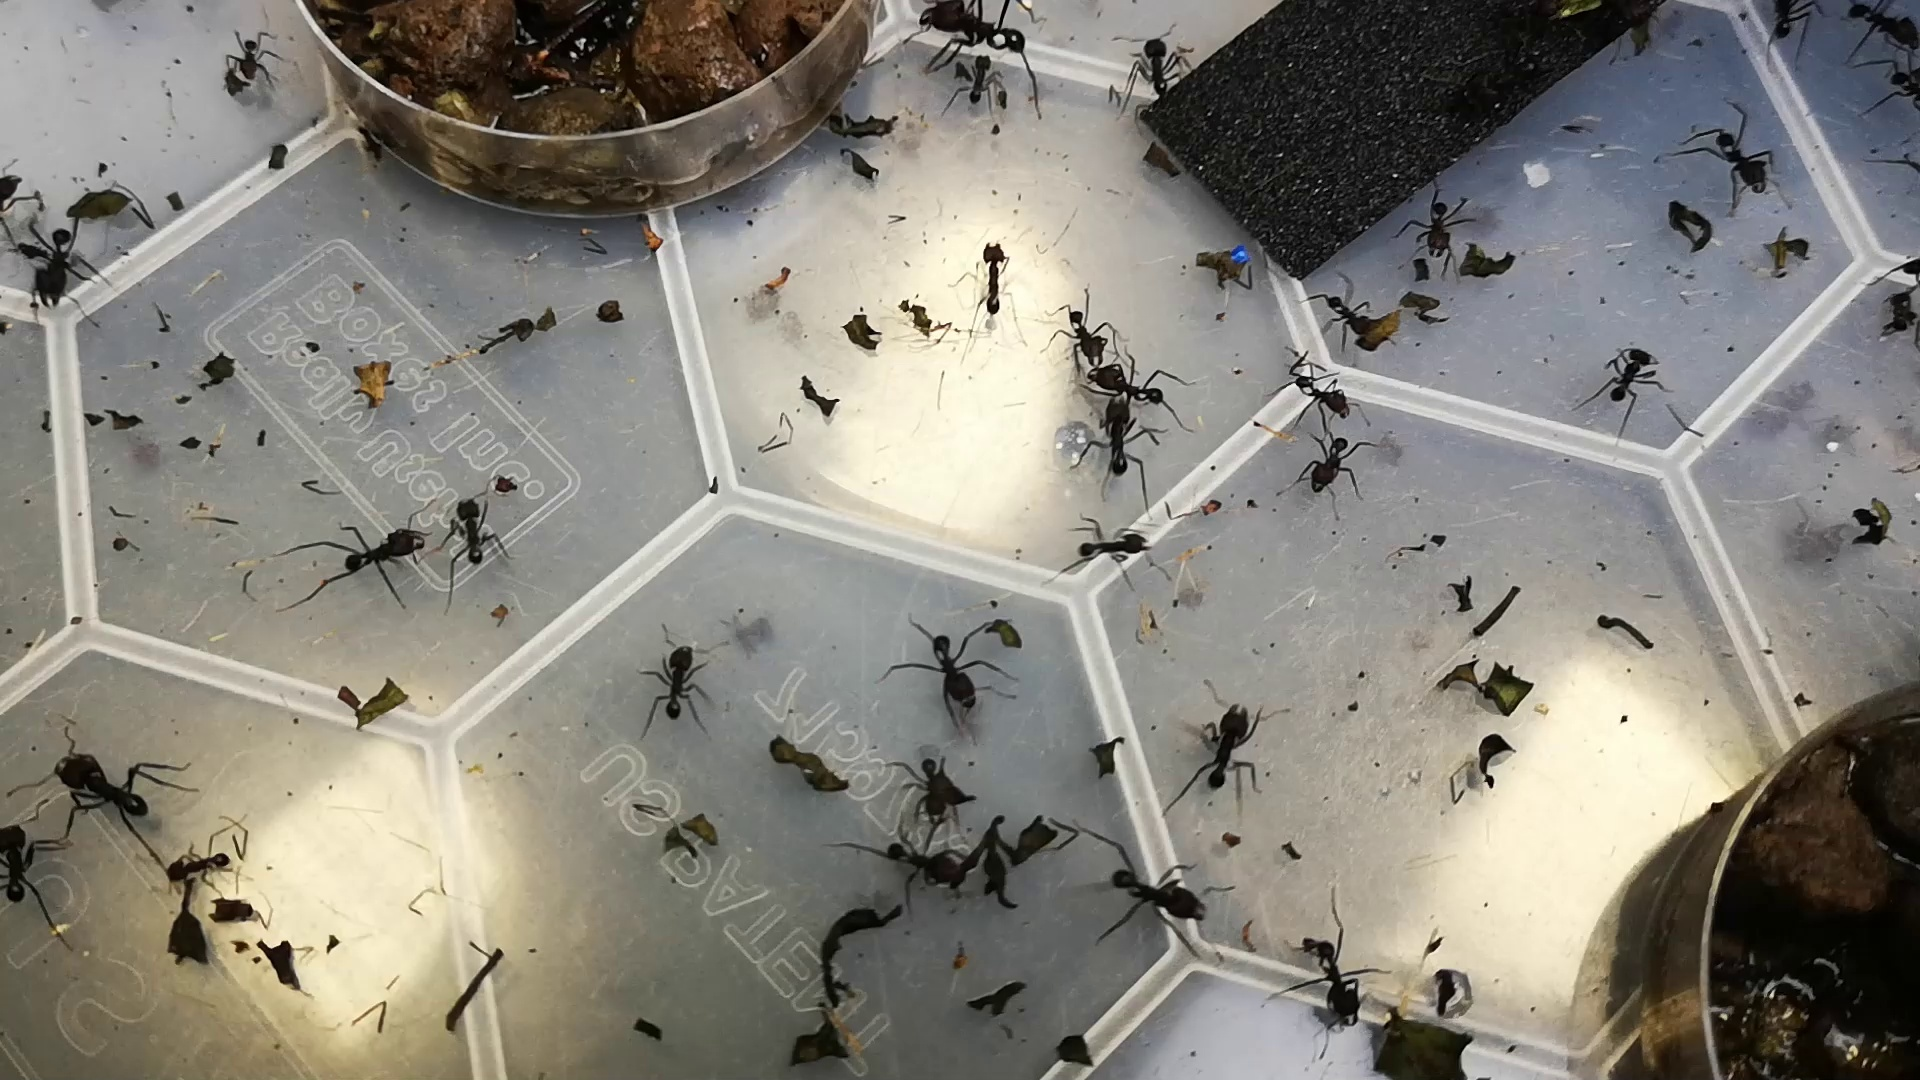

In [ ]:
vidcap = cv2.VideoCapture('Videos/rec_outside_foraging_handheld_plain_450_frames.mp4')
_,frame = vidcap.read()
vidcap.release()

Image(data=cv2.imencode(".jpeg", frame)[1].tobytes())

Still working on displaying annotations to above images within python. I also have some more annotated data that I'm working on organizing to be included with the above. 